In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [17]:
#loading Dataset
(X_train, _), (X_test, _) = cifar10.load_data()

In [18]:
#convert to float + normalize
X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

In [19]:
#convert RGB to Grayscale
def rgb_to_gray(images):
    return np.dot(images[...,:3], [0.299, 0.587, 0.114])[..., np.newaxis]

X_train_gray = rgb_to_gray(X_train)
X_test_gray = rgb_to_gray(X_test)

In [20]:
#buidling AutoEncoder Model (Simple CNN)
def build_autoencoder():

    inp = Input(shape=(32, 32, 1))

    # ----- Encoder -----
    x = Conv2D(32, 3, activation='relu', padding='same')(inp)
    x = MaxPooling2D(2)(x)

    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = MaxPooling2D(2)(x)

    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    encoded = MaxPooling2D(2)(x)

    # ----- Decoder -----
    x = UpSampling2D(2)(encoded)
    x = Conv2D(128, 3, activation='relu', padding='same')(x)

    x = UpSampling2D(2)(x)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)

    x = UpSampling2D(2)(x)
    decoded = Conv2D(3, 3, activation='sigmoid', padding='same')(x)

    autoencoder = Model(inp, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,779 (1.20 MB)

 Trainable params: 315,779 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#train the AutoEncoder
history = autoencoder.fit(
    X_train_gray, X_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 422s 596ms/step - loss: 0.0220 - val_loss: 0.0121
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 423s 601ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 418s 593ms/step - loss: 0.0104 - val_loss: 0.0097
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 427s 606ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 429s 609ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 439s 605ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 425s 604ms/step - loss: 0.0090 - val_loss: 0.0093
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 431s 589ms/step - loss: 0.0086 - val_loss: 0.0087
Epoch 9/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 443s 590ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 10/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 452s 604ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 11/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 422s 599ms/step - loss: 0.0082 - val_loss: 0.0085
Epoch 12

In [22]:
#predict colorized output
pred = autoencoder.predict(X_test_gray[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


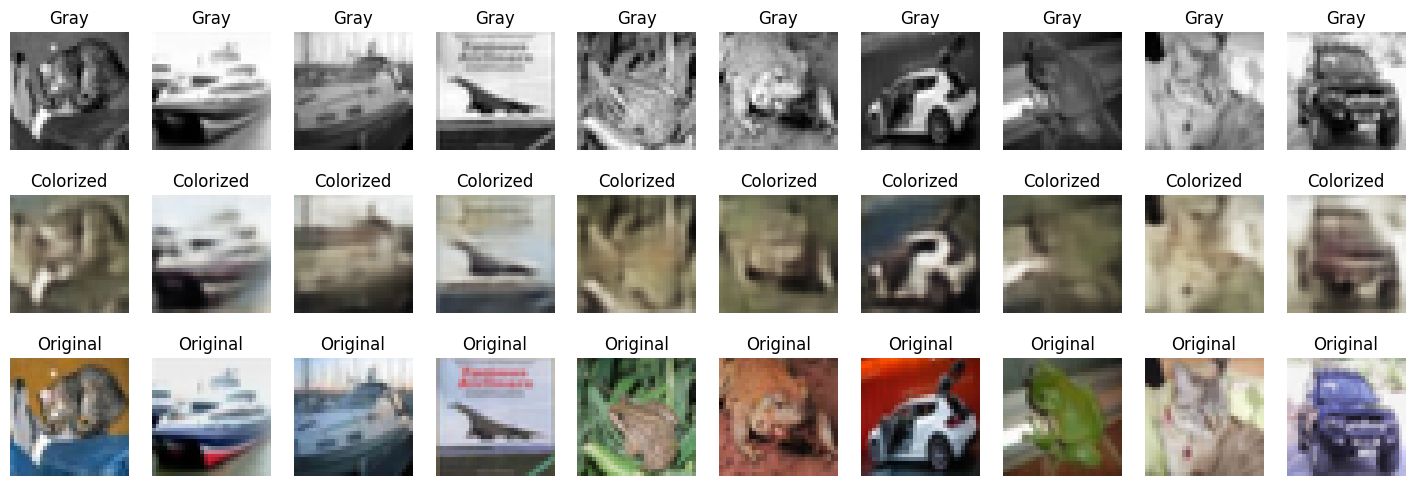

In [23]:
#before vs After
n = 10
plt.figure(figsize=(18,6))

for i in range(n):

    # grayscale input
    plt.subplot(3, n, i+1)
    plt.imshow(X_test_gray[i].reshape(32,32), cmap='gray')
    plt.title("Gray")
    plt.axis('off')

    # reconstructed color image
    plt.subplot(3, n, i+n+1)
    plt.imshow(pred[i])
    plt.title("Colorized")
    plt.axis('off')

    # original image
    plt.subplot(3, n, i+2*n+1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis('off')

plt.show()


In [26]:
autoencoder.save("image_colorizer.keras")

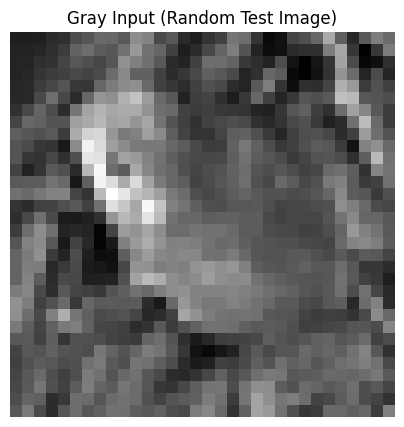

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


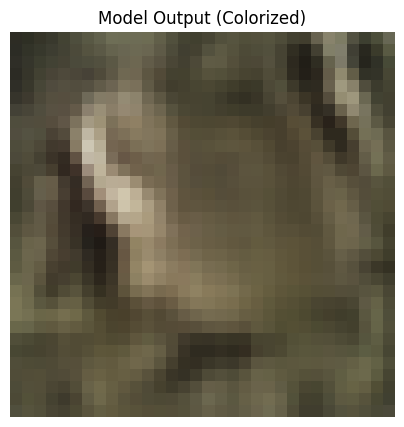

In [28]:
import random
import matplotlib.pyplot as plt

# Pick a random test image
idx = random.randint(0, len(X_test_gray) - 1)

# Show grayscale input
plt.figure(figsize=(5,5))
plt.imshow(X_test_gray[idx].reshape(32, 32), cmap='gray')
plt.title("Gray Input (Random Test Image)")
plt.axis('off')
plt.show()

# Model prediction
pred = autoencoder.predict(X_test_gray[idx].reshape(1, 32, 32, 1))[0]

# Ensure output is clipped between 0 and 1
pred = pred.clip(0,1)

# Show model output
plt.figure(figsize=(5,5))
plt.imshow(pred)
plt.title("Model Output (Colorized)")
plt.axis('off')
plt.show()
